### Imports

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
#imports
import scipy.io
import os
import pandas
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec
import obspy
import pywt
import pywt.data

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

### Load the trimmed data 

In [3]:
dir_path = "/Users/ecem/Desktop/seperate-axis"
y = np.load(dir_path + "/y-10sec.npy", allow_pickle= True)

In [4]:
y.shape

(2392, 2560)

## Let's look at wavelet decomposition for a signal piece

#### how our decomposition filter values look like

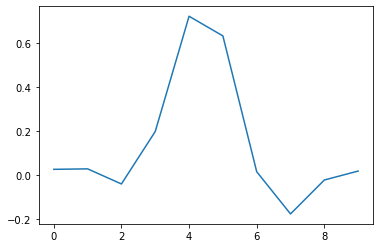

In [5]:
w = pywt.Wavelet('sym5')
plt.plot(w.dec_lo)
coeffs = pywt.wavedec(y[0], w, level=6)

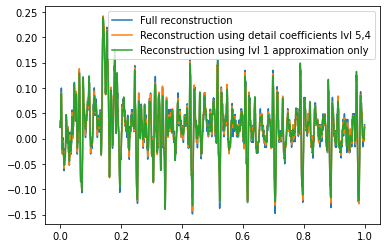

In [6]:
def reconstruction_plot(yyy, **kwargs):
    """Plot signal vector on x [0,1] independently of amount of values it contains."""
    plt.plot(np.linspace(0, 1, len(yyy)), yyy, **kwargs)

reconstruction_plot(pywt.waverec(coeffs, w)) # full reconstruction 
reconstruction_plot(pywt.waverec(coeffs[:-1] + [None] * 1, w)) # leaving out detail coefficients up to lvl 5
reconstruction_plot(pywt.waverec(coeffs[:-2] + [None] * 2, w)) # leaving out detail coefficients up to lvl 4
#reconstruction_plot(pywt.waverec(coeffs[:-3] + [None] * 3, w)) # leaving out detail coefficients up to lvl 3
#reconstruction_plot(pywt.waverec(coeffs[:-4] + [None] * 4, w)) # leaving out detail coefficients up to lvl 2
#reconstruction_plot(pywt.waverec(coeffs[:-5] + [None] * 5, w)) # leaving out detail coefficients up to lvl 1
#reconstruction_plot(pywt.waverec(coeffs[:-6] + [None] * 6, w)) # leaving out all detail coefficients = reconstruction using lvl1 approximation only
plt.legend(['Full reconstruction', 'Reconstruction using detail coefficients lvl 5,4', 'Reconstruction using lvl 1 approximation only'])

Amplitude of the coefficient corresponds to amplitude with which the wavelet occurs in the signal (y axis), and position of the coefficient corresponds to the time (x axis). 

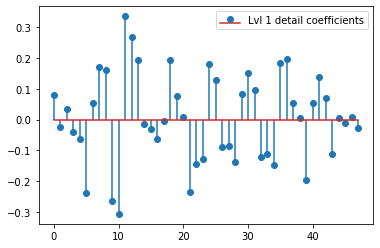

In [7]:
plt.stem(coeffs[1]); plt.legend(['Lvl 1 detail coefficients'])

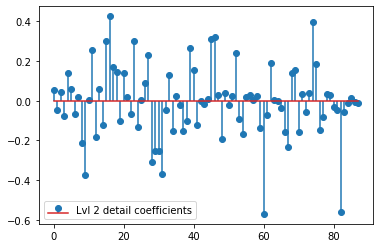

In [8]:
plt.stem(coeffs[2]); plt.legend(['Lvl 2 detail coefficients'])


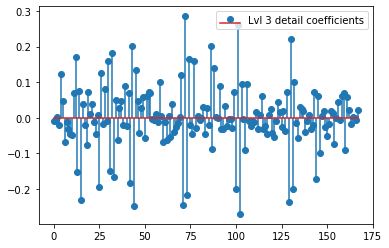

In [9]:
plt.stem(coeffs[3]); plt.legend(['Lvl 3 detail coefficients'])


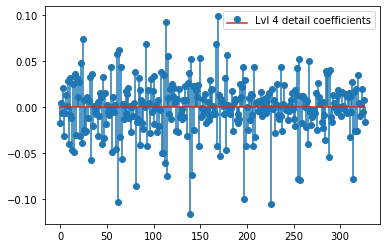

In [10]:
plt.stem(coeffs[4]); plt.legend(['Lvl 4 detail coefficients'])


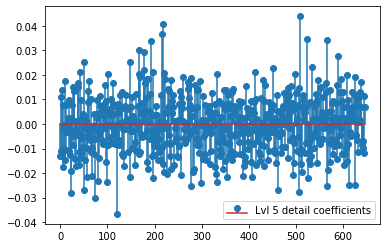

In [11]:
plt.stem(coeffs[5]); plt.legend(['Lvl 5 detail coefficients'])


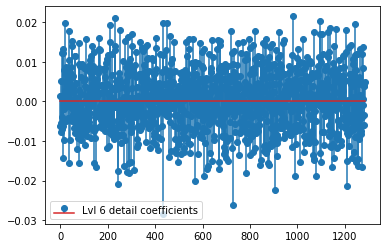

In [12]:
plt.stem(coeffs[6]); plt.legend(['Lvl 6 detail coefficients'])

In [13]:
# Reconstruction of signal using just lvl1 approximation
approx_lvl1 = pywt.waverec(coeffs[:-6] + [None] * 6, w)
# interpolate to original amount of samples (necessary due to numeric solution of transformation not yielding same amount of values)
approx_lvl1_interp = np.interp(x=np.arange(0, len(y[0])), xp=np.linspace(0, 525, len(approx_lvl1)), fp=approx_lvl1)
y_without_lvl1approx = y[0] - approx_lvl1_interp

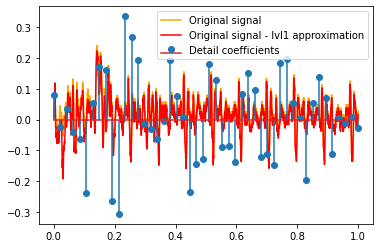

In [14]:
def reconstruction_stem(yyy, **kwargs):
    """Plot coefficient vector on x [0,1] independently of amount of values it contains."""
    plt.stem(np.linspace(0, 1, len(yyy)), yyy, **kwargs)

reconstruction_plot(y[0], color='orange')
reconstruction_plot(y_without_lvl1approx, color='red')
reconstruction_stem(coeffs[1])
plt.legend(['Original signal', 'Original signal - lvl1 approximation', 'Detail coefficients'])

### Now let's get coef for all pieces

In [15]:
coef_diseased_y = []
for i in range(len(y)):
    coef_diseased_y.append(pywt.wavedec(y[i], w, level=6))

In [16]:
import pandas as pd

In [17]:
y_w = np.array(coef_diseased_y)

In [18]:
y_w.shape

(2392, 7)

### Level by level

In [19]:
def level_coef_extractor_3d(array, lvl = 0):
    
    lenn = array[0][lvl].shape[0] #48
    coef = np.ones(shape = ( array.shape[0],lenn)) #2392,48
    
    for i in range(array.shape[0]):
        coef[i,:] = array[i][lvl]
        
    return coef

In [20]:
def saver(array = 0, lvl = 0, dir_path = None, name = 'blank'):
    coefs = level_coef_extractor_3d(array, lvl)
    np.save(dir_path + "/"+ str(name) + "_lvl_"  + str(lvl), coefs, allow_pickle = True)
    del coefs

In [21]:
saver(y_w, 0, dir_path, 'y-axis-wavelet')


In [22]:
y_w.shape

(2392, 7)

In [23]:
y_w[0][1].shape

(48,)

In [24]:
d= np.load(dir_path+ "/y-axis-wavelet_lvl_0.npy",  allow_pickle = True)

In [25]:
d.shape

(2392, 48)

In [26]:
d[0]

array([ 0.23156399,  0.26243075,  0.23323055,  0.15252667, -0.08500168,
        0.34672479,  0.13463163,  0.43651791,  0.34873409,  1.04654569,
        0.35811862,  0.167887  ,  0.20903475,  0.09683844,  0.14738846,
        0.12211707,  0.20329062,  0.02529803,  0.21655195,  0.19992574,
        0.16694362,  0.09837566,  0.3018115 ,  0.31797317,  0.19246788,
        0.25129612,  0.16055705,  0.19870917,  0.09887269,  0.10885945,
        0.12276258,  0.12160554,  0.05474345,  0.10525992,  0.23078375,
        0.1268196 ,  0.19031242,  0.14886907,  0.13287354,  0.02544115,
        0.08857824,  0.06928459,  0.11545693,  0.07980345,  0.12996994,
        0.1145156 ,  0.11375306,  0.12612556])

In [27]:
d[10]

array([-0.3355538 , -0.38981117, -0.34235348, -0.13238354,  0.40164277,
        0.07995828,  0.12948521,  0.04399081,  0.07836218,  0.1280854 ,
        0.06969146,  0.10082352,  0.21404744,  0.20072758,  0.24077727,
        0.15925391,  0.16247126,  0.05228124,  0.06563295,  0.04393516,
       -0.00570139,  0.0275503 ,  0.04266611,  0.1230075 ,  0.09995934,
        0.13836795,  0.19313406,  0.04189478,  0.06903622, -0.01250612,
        0.08036557, -0.00090455,  0.03567457,  0.13313954,  0.06508784,
        0.14084669,  0.05058274,  0.0750087 , -0.02479807, -0.0022426 ,
        0.01577845, -0.02076685,  0.03193872,  0.05700634,  0.14105342,
        0.1010346 ,  0.10538275,  0.12710378])

### Check whether each data saved correctly

In [28]:
def column_namer(level = 0, lenght = 48):
    x = []
    for i in range(lenght):
        x.append("lvl{0}_x{1}".format(level, i))
    
    return x 

In [29]:
import pandas as pd

In [30]:
def dataframe_checker(path, name = "y-axis-wavelet", df = pd.DataFrame(), level = 0):

    values  = []

    array = np.load(path + "/" + name + "_lvl_{}.npy".format(level), allow_pickle = True)
    columns = column_namer(level = level, lenght = array.shape[1])
    
    for i in range(array.shape[0]):
        values.append(array[i].tolist()) 

        medium = pd.DataFrame([values[i]], columns = columns)
        
        df = pd.concat([df, medium], axis = 0)
        
    
    return df

In [31]:
df = dataframe_checker(dir_path,  "y-axis-wavelet", level = 0 )
df

,lvl0_x0,lvl0_x1,lvl0_x2,lvl0_x3,lvl0_x4,lvl0_x5,lvl0_x6,lvl0_x7,lvl0_x8,lvl0_x9,...,lvl0_x38,lvl0_x39,lvl0_x40,lvl0_x41,lvl0_x42,lvl0_x43,lvl0_x44,lvl0_x45,lvl0_x46,lvl0_x47
0,0.231564,0.262431,0.233231,0.152527,-0.085002,0.346725,0.134632,0.436518,0.348734,1.046546,...,0.132874,0.025441,0.088578,0.069285,0.115457,0.079803,0.129970,0.114516,0.113753,0.126126
0,0.253900,0.295573,0.272919,0.191222,0.048884,0.154804,0.156841,0.220005,0.163333,0.166878,...,0.062175,0.011569,0.090232,0.110985,0.004871,0.056638,0.134979,0.117246,0.114756,0.115807
0,0.283352,0.348275,0.314589,0.172666,-0.078952,-0.000013,-0.091800,-0.050071,-0.003738,0.041558,...,-0.064819,-0.036900,-0.037650,0.031581,-0.002428,-0.096666,-0.344453,-0.267819,-0.267015,-0.288830
0,-0.126225,-0.179954,-0.153752,-0.037751,0.153626,-0.001553,-0.017057,-0.066017,-0.019753,-0.100108,...,0.247112,0.544791,0.323636,0.259321,0.215905,0.114670,0.007103,0.047799,0.047395,0.035898
0,0.083288,0.044736,0.057030,0.100673,0.098027,0.025370,0.071696,0.212848,0.103452,0.146497,...,0.123347,-0.019884,0.026456,0.121373,0.155049,0.090125,0.190238,0.162412,0.161040,0.176742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,-0.066117,-0.082801,-0.081003,-0.086436,-0.167779,-0.280567,-0.264520,-0.152457,-0.065026,0.063117,...,0.034824,0.014150,0.011898,-0.107817,-0.135066,-0.156479,-0.110034,-0.119612,-0.120966,-0.118540
0,-0.157331,-0.162869,-0.160481,-0.146112,-0.124212,0.015042,0.001941,0.076276,0.102288,0.130526,...,0.007596,0.076328,0.128414,0.197400,0.206615,0.236486,0.266597,0.248253,0.252356,0.258788
0,0.110429,0.102157,0.110079,0.135278,0.203979,0.216649,0.231367,0.198046,0.065528,-0.071512,...,0.191958,0.164914,0.192456,0.218683,0.208883,0.357074,0.437500,0.402216,0.404598,0.412258
0,0.204636,0.210665,0.208311,0.191425,0.159160,0.020818,-0.095598,-0.173378,-0.237128,-0.388895,...,0.141941,0.198131,0.135044,0.056258,-0.012412,-0.045672,-0.071946,-0.067018,-0.064674,-0.063820


In [32]:
df.to_csv(dir_path + '/y-axis-wavelet_lvl_0.csv')